### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# Import Required Libraries


In [1]:
# Set full screen mode
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))
        
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from graphviz import Source
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

# Data Import and Cleaning

In [4]:
path_ar = 'audit_risk.csv'
path_trial = 'trial.csv'

In [5]:
#Reading Trial Data file
df_trail = pd.read_csv(path_trial)
df_trail.info() # checking basic info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [6]:
#Reading audit_risk data file
df_ar = pd.read_csv(path_ar)
df_ar.info() # checking basic info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [7]:
df_ar.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

### Merging both datasets
Comparing both the datasets we can see that 'trail.csv' contains the following columns that are not present in auditrisk.csv : Marks, Money Marks, Loss Score, History Score & Loss

In [8]:
df_ar = pd.concat([df_ar,df_trail[['Marks','MONEY_Marks','LOSS_SCORE','History_score','Loss']]],axis = 1)

### Imputing Missing values

In [9]:
df_ar.Money_Value.describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [10]:
#filtering Rows as int in Location ID
df_ar.LOCATION_ID.value_counts().sort_index()

1          11
11         26
12         47
13         35
14         20
15         35
16         52
17          1
18         16
19         68
2          41
20          5
21          8
22         24
23          1
24          1
25          6
27          8
28          8
29         21
3           3
30          4
31         12
32         29
33          1
34          1
35          2
36          4
37         10
38          4
39          9
4          37
40          3
41          1
42          1
43          7
44          1
5          44
6          33
7           4
8          76
9          53
LOHARU      1
NUH         1
SAFIDON     1
Name: LOCATION_ID, dtype: int64

- Imputing These Three values in Location ID, we can see that 10,26 and 45 are missing from sequence so we will impute this column with these values.

In [11]:
df_ar[df_ar.LOCATION_ID=="LOHARU"]['LOCATION_ID'] = 10
df_ar[df_ar.LOCATION_ID=="NUH"]['LOCATION_ID'] = 26
df_ar[df_ar.LOCATION_ID=="SAFIDON"]['LOCATION_ID'] = 45

In [12]:
#imputing One missing Value in Money value
df_ar.Money_Value[df_ar.Money_Value.isnull() == True] =14.15

# Data Exploration and Feature Selection

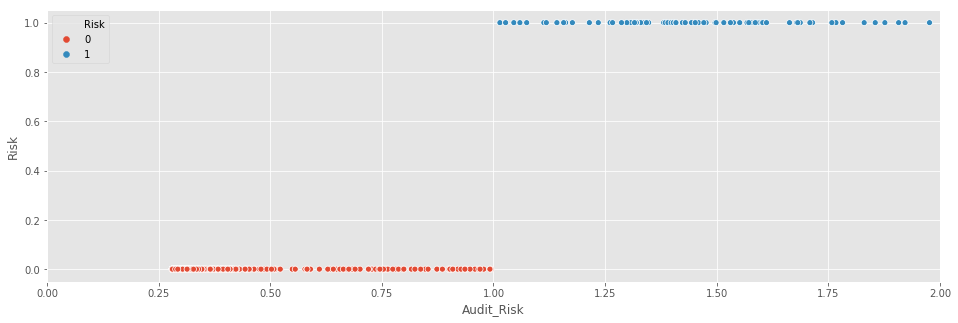

In [13]:
plt.figure(figsize = (16,5))
sns.scatterplot(x='Audit_Risk', y="Risk",hue = 'Risk', data=df_ar)
plt.xlim(0,2)
plt.plot
df_ar_cleaned = df_ar.drop(['Risk','LOCATION_ID'],axis = 1)

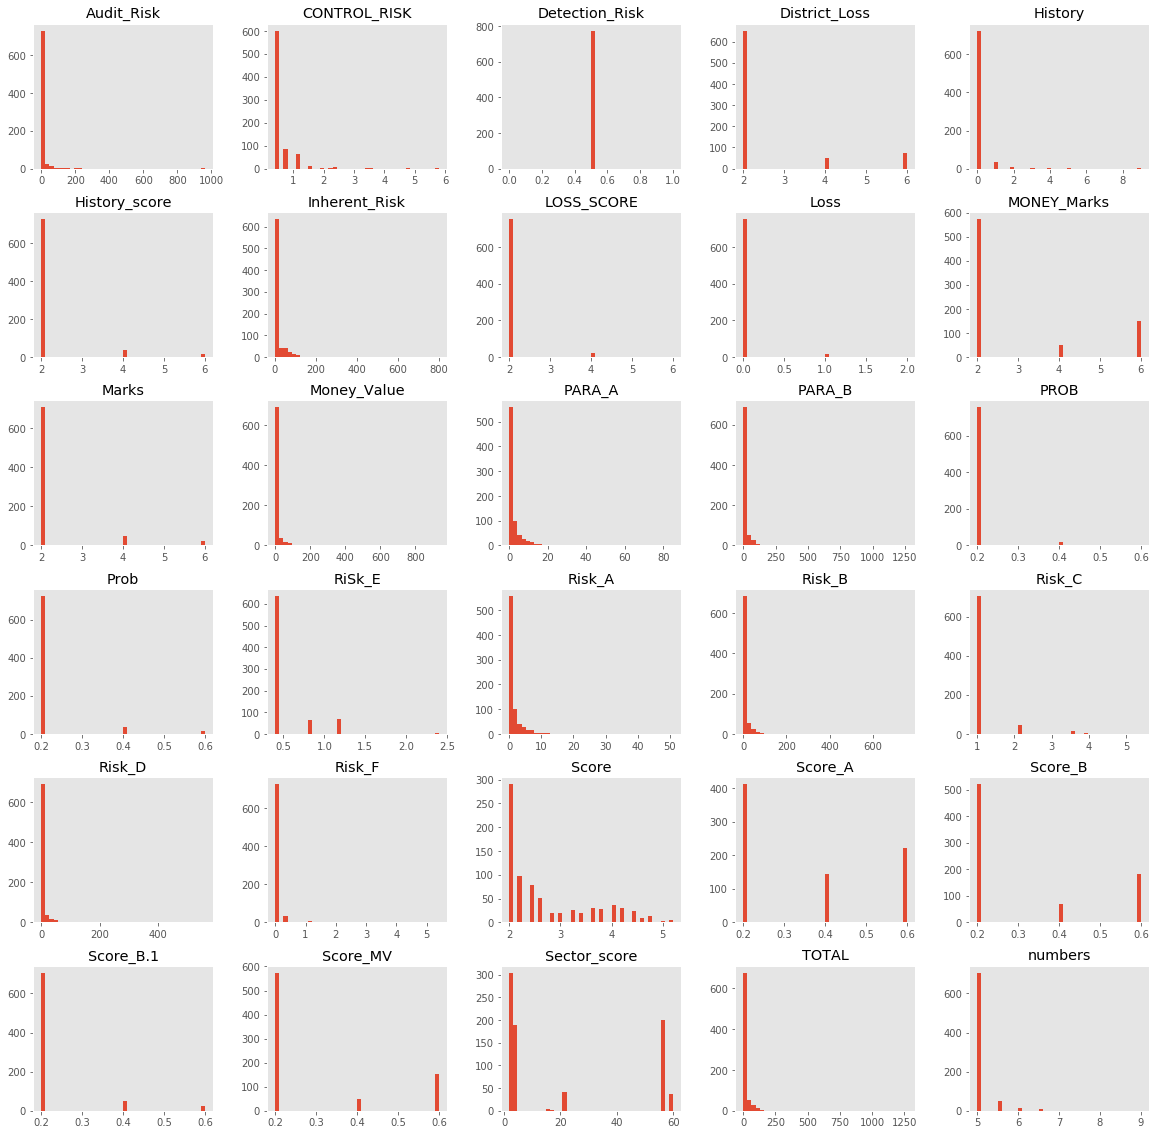

In [14]:
df_ar_cleaned.hist(grid = False,figsize = (20,20),bins = 40)
plt.show()

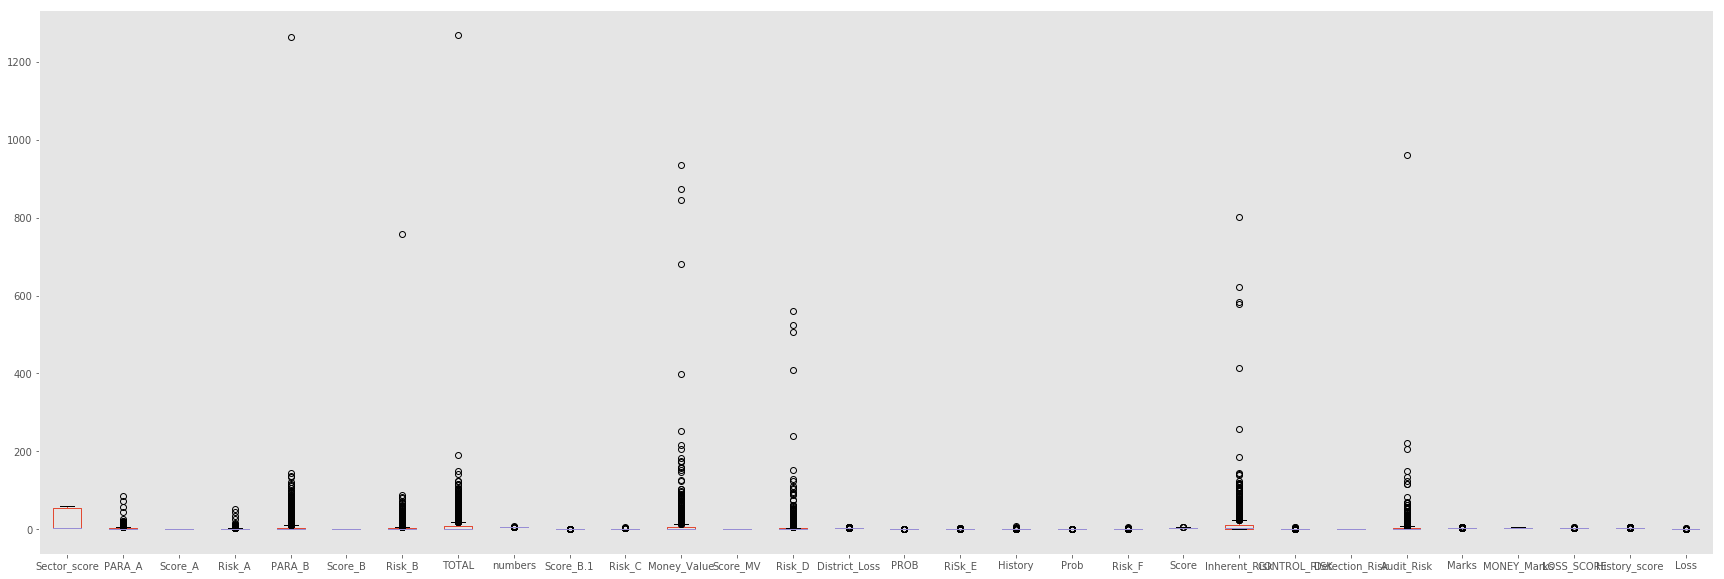

In [15]:
df_ar_cleaned.boxplot(grid = False,figsize = (30,10))
plt.show()

In [16]:
for i in df_ar_cleaned.columns:
    x = len(df_ar_cleaned[i].unique())
    print("Unique Values in column " + str(i)+": \n"+ str(x))

Unique Values in column Sector_score: 
13
Unique Values in column PARA_A: 
363
Unique Values in column Score_A: 
3
Unique Values in column Risk_A: 
363
Unique Values in column PARA_B: 
358
Unique Values in column Score_B: 
3
Unique Values in column Risk_B: 
360
Unique Values in column TOTAL: 
471
Unique Values in column numbers: 
5
Unique Values in column Score_B.1: 
3
Unique Values in column Risk_C: 
5
Unique Values in column Money_Value: 
329
Unique Values in column Score_MV: 
3
Unique Values in column Risk_D: 
328
Unique Values in column District_Loss: 
3
Unique Values in column PROB: 
3
Unique Values in column RiSk_E: 
5
Unique Values in column History: 
7
Unique Values in column Prob: 
3
Unique Values in column Risk_F: 
7
Unique Values in column Score: 
17
Unique Values in column Inherent_Risk: 
584
Unique Values in column CONTROL_RISK: 
11
Unique Values in column Detection_Risk: 
1
Unique Values in column Audit_Risk: 
601
Unique Values in column Marks: 
3
Unique Values in column 

In [17]:
df_ar_cleaned.drop("Detection_Risk",axis = 1,inplace= True)

In [18]:
#Pearson Correlation
cmap=sns.diverging_palette(5, 250, as_cmap=True)
df_ar_cleaned.corr().style.background_gradient(cmap, axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Marks,MONEY_Marks,LOSS_SCORE,History_score,Loss
Sector_score,1,-0.216824,-0.425198,-0.219025,-0.13267,-0.218967,-0.130589,-0.153316,-0.15184,-0.170404,-0.166464,-0.117428,-0.31891,-0.116164,-0.108202,-0.0867504,-0.128546,-0.114798,-0.1369,-0.103223,-0.337326,-0.173278,-0.15495,-0.0919538,-0.170404,-0.31891,-0.0867504,-0.1369,-0.083153
PARA_A,-0.216824,1,0.49668,0.999267,0.16194,0.35855,0.161834,0.267042,0.133786,0.140648,0.140455,0.449274,0.285991,0.448555,0.127804,0.0437072,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,0.219759,0.140648,0.285991,0.0437072,0.172635,0.0453931
Score_A,-0.425198,0.49668,1,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,0.265983,0.20603,0.478876,0.203678,0.0886623,0.0936475,0.102677,0.177932,0.265322,0.150925,0.720488,0.32092,0.170872,0.201847,0.274594,0.478876,0.0936475,0.265322,0.0933447
Risk_A,-0.219025,0.999267,0.504878,1,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,0.142708,0.448661,0.290751,0.447913,0.127372,0.0437346,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,0.221581,0.143103,0.290751,0.0437346,0.176159,0.0458658
PARA_B,-0.13267,0.16194,0.249438,0.165287,1,0.347568,0.999936,0.9941,0.209855,0.230851,0.223054,0.125029,0.314548,0.124671,0.0829438,0.0425507,0.0793935,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,0.887794,0.230851,0.314548,0.0425507,0.316541,0.0448133
Score_B,-0.218967,0.35855,0.572655,0.362971,0.347568,1,0.348152,0.379336,0.277576,0.313798,0.303009,0.20508,0.567591,0.202174,-0.00465439,0.0925665,0.0153245,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,0.207975,0.313798,0.567591,0.0925665,0.309505,0.0988697
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1,0.994023,0.209596,0.230547,0.222742,0.125065,0.313089,0.124717,0.0831294,0.0428754,0.0797308,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,0.88757,0.230547,0.313089,0.0428754,0.316375,0.0451087
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.9941,0.379336,0.994023,1,0.217641,0.238237,0.230697,0.168662,0.337467,0.168233,0.0933415,0.0464705,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,0.888096,0.238237,0.337467,0.0464705,0.326396,0.048863
numbers,-0.15184,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1,0.90814,0.955304,0.18618,0.446666,0.186568,0.12501,0.0358074,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,0.221461,0.90814,0.446666,0.0358074,0.209598,-0.00148425
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.90814,1,0.990412,0.220336,0.507248,0.220641,0.150369,0.0368989,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,0.259737,1,0.507248,0.0368989,0.248423,0.00476134


In [19]:
#lets remove multicolineartity
corr =df_ar_cleaned.drop('Audit_Risk',axis = 1).corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >=0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_ar_cleaned.drop('Audit_Risk',axis = 1).columns[columns]
df_ar_cleaned_1 = df_ar_cleaned.drop('Audit_Risk',axis = 1)[selected_columns]
df_ar_cleaned_1.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,PROB,History,Prob,Inherent_Risk,CONTROL_RISK
0,3.89,4.18,0.6,2.50,0.2,5.0,3.38,0.2,2,0.2,0,0.2,8.574,0.4
1,3.89,0.00,0.2,4.83,0.2,5.0,0.94,0.2,2,0.2,0,0.2,2.554,0.4
2,3.89,0.51,0.2,0.23,0.2,5.0,0.00,0.2,2,0.2,0,0.2,1.548,0.4
3,3.89,0.00,0.2,10.80,0.6,6.0,11.75,0.6,2,0.2,0,0.2,17.530,0.4
4,3.89,0.00,0.2,0.08,0.2,5.0,0.00,0.2,2,0.2,0,0.2,1.416,0.4


### we conducted some research to get better knowledge about our variables and understand their relationship pertaining to the audit domain  in the Project 1
### On conducting our domain reseach and data pattern findings we found that there are many features in the data that are derived from some other features and our output (Audit risk) is also derived by multiplication of some of the variables.

### Based on our analysis we found the following relationships between different variables:

 - PARA_A * Score_A = Risk_A
 - PARA_B * Score_B = Risk_B
 - PARA_A + PARA_B = Total
 - numbers * Score_B.1 = Risk_C
 - Money_Value * Score_MV = Risk_D
 - District_Loss * Prob = Risk_E
 - History * Prob = Risk_F
 - inherent_Risk =  Total of all the Risks
 
 - Score_A... = All of the Scores are weights given to specific parameter for a particular sector, we can clarify that in the Scatter plot above in the data exploration section.
 - Score = Total of all the scores
 - Control_Risk = constant Value given to the sectors 
 - Audit Risk = inherent risk * control risk * detection risk
 
### Based on the research and analysis above we can clearly see that a lot of features are a derivation of some other features that we can call base features, hence it makes sense to use only those features that are not derived by any of the other feature i.e our base features.
### Also on of the motivations to implement Machine Learning is to reduce manual work and use automation, if we see the data, our audit team has done a lot of hard work to calculate some of the derived features so we should reduce the team hardwork by implementing only basic features and let ML do remaining required work. 
 
### Also it makes sense to drop the variable 'scores' as these are weights given to diff sectors based on various risks and base features, we will leave that to our model to figure out based on the base features.


### Let us now see the polynomial regression results on new feature list i.e taking base features that are not derivation of any other variable namely: 

### Sector_score,Para_A,Para_B,numbers,Money_Value,District_Loss,Prob,History & Prob

In [20]:
feature_list = ['Sector_score','PARA_A','PARA_B','Money_Value','District_Loss','PROB','History','Prob']

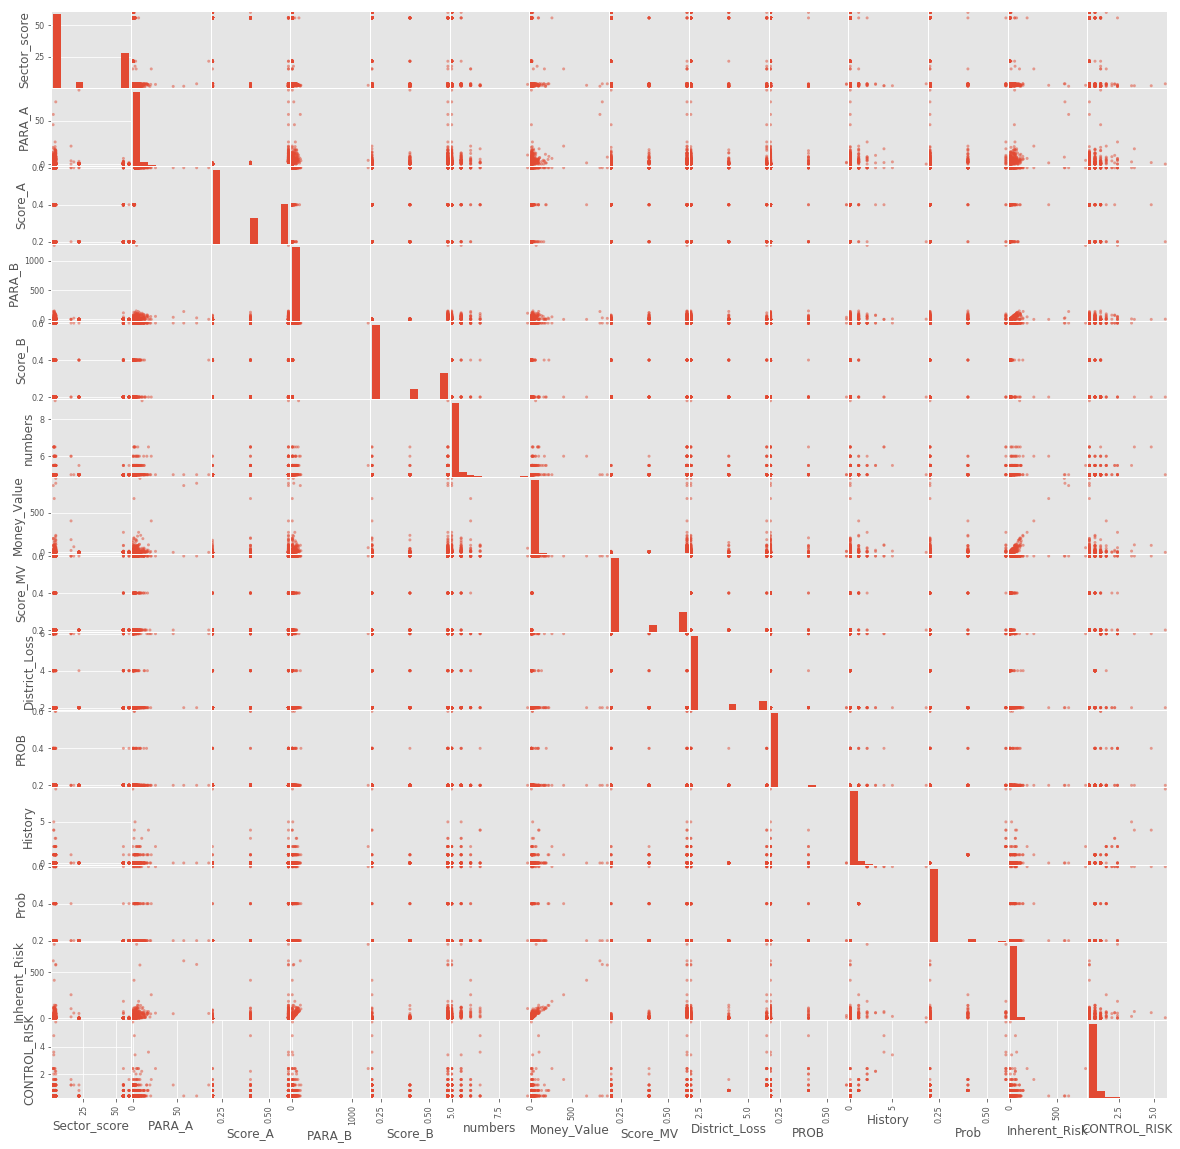

In [21]:
pd.plotting.scatter_matrix(df_ar_cleaned_1,figsize = (20,20))
plt.show()

In [22]:
X = df_ar[feature_list]
y = df_ar.Audit_Risk

In [23]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)


X.corr().style.background_gradient(cmap, axis=1)

,Sector_score,PARA_A,PARA_B,Money_Value,District_Loss,PROB,History,Prob
Sector_score,1,-0.216824,-0.13267,-0.117428,-0.108202,-0.0867504,-0.114798,-0.1369
PARA_A,-0.216824,1,0.16194,0.449274,0.127804,0.0437072,0.118279,0.172635
PARA_B,-0.13267,0.16194,1,0.125029,0.0829438,0.0425507,0.203582,0.316541
Money_Value,-0.117428,0.449274,0.125029,1,0.0282279,0.0317809,0.0800781,0.11218
District_Loss,-0.108202,0.127804,0.0829438,0.0282279,1,0.0553044,0.0693794,0.0839216
PROB,-0.0867504,0.0437072,0.0425507,0.0317809,0.0553044,1,0.110063,0.141471
History,-0.114798,0.118279,0.203582,0.0800781,0.0693794,0.110063,1,0.859296
Prob,-0.1369,0.172635,0.316541,0.11218,0.0839216,0.141471,0.859296,1


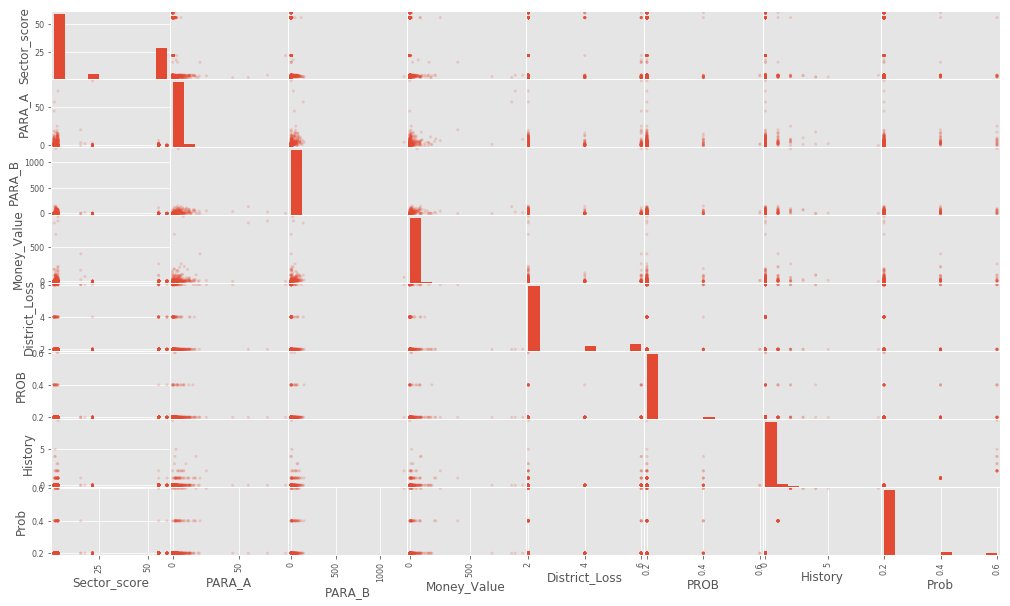

In [24]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(17,10))
plt.show()

I do not see any of the feature near to normal distribution lets dig more deep into it.

In [25]:
X.columns

Index(['Sector_score', 'PARA_A', 'PARA_B', 'Money_Value', 'District_Loss',
       'PROB', 'History', 'Prob'],
      dtype='object')

# Data Splitting and scaling

In [26]:
#Splitting the data into two parts: Train and Test
X = df_ar_cleaned_1
y = df_ar_cleaned.Audit_Risk
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)
print("Size of training set: {}      size of test set:"
      " {}\n".format(X_train_org.shape[0], X_test_org.shape[0]))

Size of training set: 582      size of test set: 194



In [27]:
#Using Standard Scaler scaling the data
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Regression
- Bagging and Pasting
    - SVM('rbf')
    - Decision Tree
    
- Adaboost
    - SVM('rbf')
    - Decision Tree

- Gradient Boosting Regressor        

## Bagging - SVM('rbf')

In [28]:
#defining svr model using the best parameters we found in project 1

svr = SVR(kernel='rbf',C =  1000, gamma =  0.01,epsilon = 0.1,)
bag_reg = BaggingRegressor(svr, n_estimators=400,max_samples=400,bootstrap=True, oob_score = True,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print(bag_reg.oob_score_)
print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))

ynew=bag_reg.predict(X_test)
y_train_pred=bag_reg.predict(X_train)
# print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
# print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

0.8514635780593249
Train score 0.9584526505965952
Test score 0.1288059873175159


In [29]:
#Using Grid search to tune best bagging parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400,500],
             'max_samples': [100,200,300,400]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [100, 200, 300, 400]}


In [30]:
grid_search = GridSearchCV(BaggingRegressor(svr), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 400, 'n_estimators': 500}
Best cross-validation score: 0.87


In [31]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.733683,0.793817,100,100
1,0.735801,0.792119,200,100
2,0.728813,0.793904,300,100
3,0.736217,0.787073,400,100
4,0.731624,0.790636,500,100
5,0.804834,0.894148,100,200
6,0.802301,0.898286,200,200
7,0.805249,0.900229,300,200
8,0.811131,0.896686,400,200
9,0.807508,0.897263,500,200


In [32]:
#Implementing Best parameter
bag_reg = BaggingRegressor(svr, n_estimators=300,max_samples=400,bootstrap=True, oob_score = True,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print(bag_reg.oob_score_)
print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))

0.8565537918489807
Train score 0.9607710651795538
Test score 0.12949922055768992


## Bagging - Decision Tree

In [33]:
#defining DT model using the best parameters we found in project 1

dtree = DecisionTreeRegressor(max_depth=8)
bag_reg = BaggingRegressor(dtree, n_estimators=400,max_samples=400,bootstrap=True, oob_score = True,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print(bag_reg.oob_score_)
print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))


ynew=bag_reg.predict(X_test)
y_train_pred=bag_reg.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

0.8073970587970059
Train score 0.9464398593368893
Test score 0.199340045434392
Train mean squared error 15.033129312617723
Train mean squared error 4090.6298258585216


In [34]:
#Using Grid search to tune best bagging parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400,500],
             'max_samples': [100,200,300,400]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [100, 200, 300, 400]}


In [35]:
grid_search = GridSearchCV(BaggingRegressor(dtree), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 400, 'n_estimators': 400}
Best cross-validation score: 0.86


In [36]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.711840,0.787245,100,100
1,0.734265,0.774152,200,100
2,0.712526,0.775682,300,100
3,0.718172,0.773345,400,100
4,0.726956,0.776021,500,100
5,0.799800,0.871783,100,200
6,0.810178,0.885347,200,200
7,0.817053,0.891311,300,200
8,0.810857,0.886485,400,200
9,0.812132,0.885242,500,200


In [37]:
#Implementing Best parameter
bag_reg = BaggingRegressor(dtree, n_estimators=300,max_samples=300,bootstrap=True, oob_score = True,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print(bag_reg.oob_score_)
print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))


0.7821730671511649
Train score 0.9117378827307125
Test score 0.17882837137174212


## Pasting - SVM('rbf')

In [38]:
#defining svr model using the best parameters we found in project 1

svr = SVR(kernel='rbf',C =  1000, gamma =  0.01,epsilon = 0.1)
bag_reg = BaggingRegressor(svr, n_estimators=100,max_samples=100,bootstrap=False,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)


print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))


ynew=bag_reg.predict(X_test)
y_train_pred=bag_reg.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score 0.7804837797281038
Test score 0.10273652407025868
Train mean squared error 61.613275930721514
Train mean squared error 4584.184228725442


In [40]:
#Using Grid search to tune best bagging parameters

param_grid = {'n_estimators': [100,200,300],
             'max_samples': [100,200,300],
             'bootstrap':[False]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(BaggingRegressor(svr), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_estimators': [100, 200, 300], 'max_samples': [100, 200, 300], 'bootstrap': [False]}
Best parameters: {'bootstrap': False, 'max_samples': 300, 'n_estimators': 300}
Best cross-validation score: 0.88


In [41]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.735959,0.805142,100,100
1,0.743932,0.810818,200,100
2,0.738645,0.812480,300,100
3,0.827280,0.930188,100,200
4,0.838813,0.929360,200,200
5,0.833102,0.931399,300,200
6,0.878714,0.975021,100,300
7,0.883062,0.980696,200,300
8,0.883998,0.979156,300,300


In [42]:
#Implementing Best parameter

bag_reg = BaggingRegressor(svr, n_estimators=200,max_samples=400,bootstrap=False,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))



Train score 0.9905562229595989
Test score 0.13842841198358913


## Pasting - Decision Tree

In [43]:
#defining DT model using the best parameters we found in project 1

dtree = DecisionTreeRegressor(max_depth=8)
bag_reg = BaggingRegressor(dtree, n_estimators=400,max_samples=400,bootstrap=False,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))


ynew=bag_reg.predict(X_test)
y_train_pred=bag_reg.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score 0.9817333435938411
Test score 0.18889184199077338
Train mean squared error 5.127040453276462
Train mean squared error 4144.010455661959


In [44]:
param_grid = {'n_estimators': [100,200,300],
             'max_samples': [100,200,300],
             'bootstrap':[False]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(BaggingRegressor(dtree), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

Parameter grid:
{'n_estimators': [100, 200, 300], 'max_samples': [100, 200, 300], 'bootstrap': [False]}
Best parameters: {'bootstrap': False, 'max_samples': 300, 'n_estimators': 300}
Best cross-validation score: 0.84


,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.729648,0.815106,100,100
1,0.734497,0.795688,200,100
2,0.730311,0.807372,300,100
3,0.822560,0.923344,100,200
4,0.831402,0.921369,200,200
5,0.839242,0.921530,300,200
6,0.821809,0.970879,100,300
7,0.823142,0.973502,200,300
8,0.839670,0.971386,300,300


In [45]:
#Implementing Best parameter
bag_reg = BaggingRegressor(dtree, n_estimators=300,max_samples=300,bootstrap=False,random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print("Train score {}".format(bag_reg.score(X_train, y_train)))
print("Test score {}".format(bag_reg.score(X_test, y_test)))

Train score 0.9557833513028466
Test score 0.19580287817856856


## Adaboost - SVM('rbf')

In [46]:
from sklearn.ensemble import AdaBoostRegressor

svr = SVR(kernel='rbf',C =  1000, gamma =  0.01,epsilon = 0.1,)

ada_reg = AdaBoostRegressor(svr, n_estimators=150,  learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)
print("Train score {}".format(ada_reg.score(X_train, y_train)))
print("Test score {}".format(ada_reg.score(X_test, y_test)))


ynew=ada_reg.predict(X_test)
y_train_pred=ada_reg.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score 0.9999774900675116
Test score 0.14393362936433685
Train mean squared error 0.006318032808079527
Train mean squared error 4373.705227379083


In [47]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'learning_rate': [0.5,1,1.5,2]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(AdaBoostRegressor(svr), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_learning_rate']]
df

Parameter grid:
{'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.5, 1, 1.5, 2]}
Best parameters: {'learning_rate': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.94


,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate
0,0.934763,0.999978,100,0.5
1,0.934847,0.999978,150,0.5
2,0.935018,0.999978,200,0.5
3,0.935073,0.999978,250,0.5
4,0.935080,0.999978,300,0.5
5,0.928855,0.999964,100,1
6,0.929226,0.999960,150,1
7,0.928260,0.999950,200,1
8,0.928131,0.999951,250,1
9,0.927972,0.999953,300,1


In [48]:
#Implementing Best parameter
ada_reg = AdaBoostRegressor(svr, n_estimators=100,  learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)
print("Train score {}".format(ada_reg.score(X_train, y_train)))
print("Test score {}".format(ada_reg.score(X_test, y_test)))

Train score 0.999977661094345
Test score 0.14390439040938952


## Adaboost - Decision Tree

In [49]:
from sklearn.ensemble import AdaBoostRegressor

dtree = DecisionTreeRegressor(max_depth=8)

ada_reg = AdaBoostRegressor(dtree, n_estimators=200,  learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)
print("Train score {}".format(ada_reg.score(X_train, y_train)))
print("Test score {}".format(ada_reg.score(X_test, y_test)))

ynew=ada_reg.predict(X_test)
y_train_pred=ada_reg.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score 0.9998536503730148
Test score 0.26323301591031245
Train mean squared error 0.041077055438699606
Train mean squared error 3764.1960018597947


In [50]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'learning_rate': [0.5,1,1.5,2]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(AdaBoostRegressor(dtree), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_learning_rate']]
df

Parameter grid:
{'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.5, 1, 1.5, 2]}
Best parameters: {'learning_rate': 0.5, 'n_estimators': 250}
Best cross-validation score: 0.89


,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate
0,0.856594,0.999976,100,0.5
1,0.860791,0.999914,150,0.5
2,0.426335,0.999851,200,0.5
3,0.889613,0.999720,250,0.5
4,0.859948,0.999706,300,0.5
5,0.885802,0.999030,100,1
6,0.852582,0.998481,150,1
7,0.794107,0.998409,200,1
8,0.860257,0.998019,250,1
9,0.821723,0.997780,300,1


In [51]:
#Implementing Best parameter
ada_reg = AdaBoostRegressor(dtree, n_estimators=250,  learning_rate=1.5, random_state=0)
ada_reg.fit(X_train, y_train)
print("Train score {}".format(ada_reg.score(X_train, y_train)))
print("Test score {}".format(ada_reg.score(X_test, y_test)))

Train score 0.7713554207734503
Test score 0.1453162039203142


## Tree Gradient Boosting

In [52]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=6, n_estimators=15, learning_rate=0.2, random_state=0)
gbrt.fit(X_train, y_train)
print("Train score {}".format(gbrt.score(X_train, y_train)))
print("Test score {}".format(gbrt.score(X_test, y_test)))

ynew=gbrt.predict(X_test)
y_train_pred=gbrt.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score 0.9986834268568501
Test score 0.16600821311629255
Train mean squared error 0.36953253044989065
Train mean squared error 4260.924576649333


In [53]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'learning_rate': [0.5,1,1.5,2],
             'max_depth':[3,4,5,6]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_learning_rate','param_max_depth']]
df

Parameter grid:
{'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.5, 1, 1.5, 2], 'max_depth': [3, 4, 5, 6]}
Best parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation score: 0.81


,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate,param_max_depth
0,0.789548,9.999981e-01,100,0.5,3
1,0.775163,9.999998e-01,150,0.5,3
2,0.805952,1.000000e+00,200,0.5,3
3,0.794237,1.000000e+00,250,0.5,3
4,0.781619,1.000000e+00,300,0.5,3
5,0.698846,1.000000e+00,100,0.5,4
6,0.788457,1.000000e+00,150,0.5,4
7,0.703434,1.000000e+00,200,0.5,4
8,0.755440,1.000000e+00,250,0.5,4
9,0.681003,1.000000e+00,300,0.5,4


In [54]:
#Implementing Best parameter
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.5, random_state=0)
gbrt.fit(X_train, y_train)
print("Train score {}".format(gbrt.score(X_train, y_train)))
print("Test score {}".format(gbrt.score(X_test, y_test)))

Train score 0.9999999996472428
Test score 0.1645261879805


## PCA 
 - for all models

In [55]:
df_ar_cleaned.shape

(776, 29)

In [56]:
X = df_ar_cleaned.drop('Audit_Risk',axis = 1)
y = df_ar_cleaned.Audit_Risk

In [57]:

#Splitting the data into two parts: Train and Test

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)
print("Size of training set: {}      size of test set:"
      " {}\n".format(X_train_org.shape[0], X_test_org.shape[0]))

#Using Standard Scaler scaling the data
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test =  pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

Size of training set: 582      size of test set: 194

(582, 9)
(194, 9)


In [58]:
f = open('Audit_risk_PCA_regg_result.csv','w')#Write the file
line = 'Model,Train Score,Test Score'+ '\n'
f.write(line)
f.close()

In [59]:
## Linear Regression
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train,y_train)
print('Train score: %.4f'%lreg.score(X_train,y_train))
print("Test score {}".format(lreg.score(X_test, y_test)))

f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'Linear Regression,'  +str(lreg.score(X_train,y_train)) + ',' + str(lreg.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

ynew=lreg.predict(X_test)
y_train_pred=lreg.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score: 0.7917
Test score 0.388615521544704
Train mean squared error 58.472475335431625
Train mean squared error 3123.6076793587868


In [60]:
## SGD Regressor
from sklearn.linear_model import SGDRegressor

sgd_l1 = SGDRegressor(max_iter=1000,penalty='l1',random_state= 0)
sgd_l1.fit(X_train,y_train)

print('Train score: %.4f'%sgd_l1.score(X_train,y_train))
print("Test score: {}".format(sgd_l1.score(X_test, y_test)))

ynew=sgd_l1.predict(X_test)
y_train_pred=sgd_l1.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score: 0.7908
Test score: 0.385214878052633
Train mean squared error 58.7152756198833
Train mean squared error 3140.9818138043197


In [61]:
param_grid = {'max_iter': [100,500,1000,1500,2000],
              'penalty':['l1','l2'],
             'alpha': [0.001,0.01,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_max_iter','param_penalty','param_alpha']]
df

Parameter grid:
{'max_iter': [100, 500, 1000, 1500, 2000], 'penalty': ['l1', 'l2'], 'alpha': [0.001, 0.01, 1, 10, 100]}
Best parameters: {'alpha': 1, 'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.60


,mean_test_score,mean_train_score,param_max_iter,param_penalty,param_alpha
0,0.454133,7.937841e-01,100,l1,0.001
1,0.340822,7.925236e-01,100,l2,0.001
2,0.389275,7.989092e-01,500,l1,0.001
3,0.393306,7.996235e-01,500,l2,0.001
4,0.387374,7.988222e-01,1000,l1,0.001
5,0.401260,7.987347e-01,1000,l2,0.001
6,0.409288,7.994175e-01,1500,l1,0.001
7,0.384007,7.988961e-01,1500,l2,0.001
8,0.419172,8.002351e-01,2000,l1,0.001
9,0.406572,7.995784e-01,2000,l2,0.001


In [62]:
#implementing best model
sgd_l1 = SGDRegressor(max_iter=grid_search.best_params_['max_iter'],penalty=grid_search.best_params_['penalty'],
                     alpha = grid_search.best_params_['alpha'], random_state= 0)
sgd_l1.fit(X_train,y_train)

print('Train score: %.4f'%sgd_l1.score(X_train,y_train))
print("Test score: {}".format(sgd_l1.score(X_test, y_test)))



Train score: 0.7706
Test score: 0.34304971750381574


In [63]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'SGD Regressor,'  +str(sgd_l1.score(X_train,y_train)) + ',' + str(sgd_l1.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [64]:
## Ridge Regression
from sklearn.linear_model import Ridge

ridge= Ridge(10)
ridge.fit(X_train, y_train)

print('Train score: %.4f'%ridge.score(X_train,y_train))
print("Test score: %.4f"%ridge.score(X_test, y_test))


ynew=ridge.predict(X_test)
y_train_pred=ridge.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score: 0.7917
Test score: 0.3869
Train mean squared error 58.47681924997318
Train mean squared error 3132.279717875532


In [65]:
param_grid = {'alpha': [0.001,0.01,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_alpha']]
df

Parameter grid:
{'alpha': [0.001, 0.01, 1, 10, 100]}
Best parameters: {'alpha': 100}
Best cross-validation score: 0.47


,mean_test_score,mean_train_score,param_alpha
0,0.405137,0.800635,0.001
1,0.405144,0.800635,0.01
2,0.405920,0.800634,1
3,0.412825,0.800607,10
4,0.469836,0.798365,100


In [66]:
#implementing best model

ridge= Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X_train, y_train)

print('Train score: %.4f'%ridge.score(X_train,y_train))
print("Test score: %.4f"%ridge.score(X_test, y_test))

Train score: 0.7903
Test score: 0.3740


In [67]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'Ridge Regressor,'  +str(ridge.score(X_train,y_train)) + ',' + str(ridge.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [68]:
## Lasso Regression
from sklearn.linear_model import Lasso

lasso= Lasso(0.001)
lasso.fit(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print('Train score: %.4f'%lasso.score(X_train,y_train))
print("Test score: %.4f"%lasso.score(X_test, y_test))


ynew=lasso.predict(X_test)
y_train_pred=lasso.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score: 0.7917
Test score: 0.3885
Train mean squared error 58.47248061551001
Train mean squared error 3124.1221056279237


In [69]:
param_grid = {'alpha': [0.001,0.01,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_alpha']]
df

Parameter grid:
{'alpha': [0.001, 0.01, 1, 10, 100]}
Best parameters: {'alpha': 10}
Best cross-validation score: 0.54


,mean_test_score,mean_train_score,param_alpha
0,0.405277,0.800634,0.001
1,0.406540,0.800633,0.01
2,0.508393,0.786742,1
3,0.537211,0.561688,10
4,-0.019607,0.000000,100


In [70]:
lasso= Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print('Train score: %.4f'%lasso.score(X_train,y_train))
print("Test score: %.4f"%lasso.score(X_test, y_test))

Train score: 0.5602
Test score: 0.3192


In [71]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'LASSO Regressor,'  +str(lasso.score(X_train,y_train)) + ',' + str(lasso.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [72]:
##polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
plreg = LinearRegression()

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
plreg.fit(X_train_poly, y_train)

print('Train score: %.4f'%plreg.score(X_train_poly,y_train))
print("Test score: %.4f"%plreg.score(X_test_poly, y_test))


ynew=plreg.predict(X_test_poly)
y_train_pred=plreg.predict(X_train_poly)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score: 0.9984
Test score: 0.9764
Train mean squared error 0.455065989194258
Train mean squared error 120.80220591969129


In [73]:
for i in [2,3,4]:
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    plreg.fit(X_train_poly, y_train)

    print('Train score: %.4f'%plreg.score(X_train_poly,y_train))
    print("Test score: %.4f"%plreg.score(X_test_poly, y_test))



Train score: 0.9984
Test score: 0.9764
Train score: 1.0000
Test score: -265385.0579
Train score: 1.0000
Test score: -57059269.2698


In [74]:
#Polynomial regression is not as good as linear is.
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
plreg.fit(X_train_poly, y_train)

print('Train score: %.4f'%plreg.score(X_train_poly,y_train))
print("Test score: %.4f"%plreg.score(X_test_poly, y_test))



Train score: 0.9984
Test score: 0.9764


In [75]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'Polynomial Regressor,'  +str(plreg.score(X_train_poly,y_train)) + ',' + str(plreg.score(X_test_poly, y_test)) + '\n'
f.write(line)
f.close()

In [76]:
## KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)
print("Train score : {:.4f}".format(train_score))
print("Test score: {:.4f}".format(test_score))


ynew=knn.predict(X_test)
y_train_pred=knn.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score : 0.7981
Test score: 0.1431
Train mean squared error 56.67843721223588
Train mean squared error 4377.852075558201


In [77]:
param_grid = {'n_neighbors': [1,3,5,7,9,11]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_neighbors']]
df

Parameter grid:
{'n_neighbors': [1, 3, 5, 7, 9, 11]}
Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.71


,mean_test_score,mean_train_score,param_n_neighbors
0,0.709281,1.000000,1
1,0.577925,0.857222,3
2,0.512736,0.760255,5
3,0.519888,0.681096,7
4,0.597706,0.656131,9
5,0.587912,0.624679,11


In [78]:
knn = KNeighborsRegressor(7)
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)
print("Train score : {:.4f}".format(train_score))
print("Test score: {:.4f}".format(test_score))

Train score : 0.7127
Test score: 0.1272


In [79]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'KNN Regressor,'  +str(knn.score(X_train,y_train)) + ',' + str(knn.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [80]:
## Linear SVR

svr_linear = SVR(C=1, epsilon=0.1,kernel='linear')
svr_linear.fit(X_train,y_train)

print("Train score : {:.4f}".format(svr_linear.score(X_train,y_train)))
print("Test score: {:.4f}".format(svr_linear.score(X_test,y_test)))

ynew=svr_linear.predict(X_test)
y_train_pred=svr_linear.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score : 0.6794
Test score: 0.3720
Train mean squared error 89.98918544108265
Train mean squared error 3208.6434696459887


In [81]:
param_grid = {'C':[1,10,30,100]
              ,'epsilon':[0.001,0.01,0.1,1,10]
              ,'kernel':['linear']}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_C','param_epsilon']]
df

Parameter grid:
{'C': [1, 10, 30, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']}
Best parameters: {'C': 30, 'epsilon': 1, 'kernel': 'linear'}
Best cross-validation score: 0.49


,mean_test_score,mean_train_score,param_C,param_epsilon
0,0.451348,0.703329,1,0.001
1,0.451524,0.703367,1,0.01
2,0.450454,0.703660,1,0.1
3,0.486278,0.718371,1,1
4,0.242551,0.614625,1,10
5,0.450957,0.703688,10,0.001
6,0.450553,0.703762,10,0.01
7,0.450917,0.703911,10,0.1
8,0.487959,0.719201,10,1
9,0.249722,0.615846,10,10


In [82]:
svr_linear = SVR(C=100, epsilon=1,kernel='linear')
svr_linear.fit(X_train,y_train)

print("Train score : {:.4f}".format(svr_linear.score(X_train,y_train)))
print("Test score: {:.4f}".format(svr_linear.score(X_test,y_test)))



Train score : 0.7036
Test score: 0.3723


In [83]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'Linear SVR,'  +str(svr_linear.score(X_train,y_train)) + ',' + str(svr_linear.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [84]:
## rbf SVR

svr_rbf = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_rbf.fit(X_train,y_train)

print("Train score : {:.4f}".format(svr_rbf.score(X_train,y_train)))
print("Test score: {:.4f}".format(svr_rbf.score(X_test,y_test)))

ynew=svr_rbf.predict(X_test)
y_train_pred=svr_rbf.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score : 0.9999
Test score: 0.1487
Train mean squared error 0.032380420682501
Train mean squared error 4349.281513864968


In [85]:
param_grid = {'C':[1,10,30,100]
              ,'gamma':[0.001,0.01,0.1,1,10]
             ,'kernel':['rbf']}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_C','param_gamma']]
df

Parameter grid:
{'C': [1, 10, 30, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf']}
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.84


,mean_test_score,mean_train_score,param_C,param_gamma
0,0.240642,0.187163,1,0.001
1,0.394162,0.313643,1,0.01
2,0.262662,0.199931,1,0.1
3,0.094095,0.083987,1,1
4,0.017887,0.034121,1,10
5,0.574765,0.548868,10,0.001
6,0.604825,0.613235,10,0.01
7,0.460771,0.491756,10,0.1
8,0.279037,0.384405,10,1
9,0.181443,0.337415,10,10


In [86]:
svr_rbf = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_rbf.fit(X_train,y_train)

print("Train score : {:.4f}".format(svr_rbf.score(X_train,y_train)))
print("Test score: {:.4f}".format(svr_rbf.score(X_test,y_test)))



Train score : 0.9894
Test score: 0.1469


In [87]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'SVM rbf,'  +str(svr_rbf.score(X_train,y_train)) + ',' + str(svr_rbf.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [88]:
## poly SVR

svr_poly = SVR(C=1, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_poly.fit(X_train,y_train)

print("Train score : {:.4f}".format(svr_poly.score(X_train,y_train)))
print("Test score: {:.4f}".format(svr_poly.score(X_test,y_test)))


ynew=svr_poly.predict(X_test)
y_train_pred=svr_poly.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score : 0.6791
Test score: 0.3658
Train mean squared error 90.07561754770742
Train mean squared error 3240.110530449624


In [89]:
param_grid = {'C':[1,10,30,100]
              ,'degree':[1,2,3]
             ,'kernel':['poly']}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_C','param_degree']]
df

Parameter grid:
{'C': [1, 10, 30, 100], 'degree': [1, 2, 3], 'kernel': ['poly']}
Best parameters: {'C': 1, 'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.62


,mean_test_score,mean_train_score,param_C,param_degree
0,0.615037,0.690318,1,1
1,0.033361,0.987757,1,2
2,-0.713437,0.998118,1,3
3,0.450454,0.703665,10,1
4,-0.537942,0.988962,10,2
5,-2.762443,0.999551,10,3
6,0.451222,0.703915,30,1
7,-0.862066,0.988459,30,2
8,-6.538136,0.999769,30,3
9,0.450927,0.703913,100,1


In [90]:
svr_poly = SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_poly.fit(X_train,y_train)

print("Train score : {:.4f}".format(svr_poly.score(X_train,y_train)))
print("Test score: {:.4f}".format(svr_poly.score(X_test,y_test)))

Train score : 0.6794
Test score: 0.3723


In [91]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'SVR poly,'  +str(svr_poly.score(X_train,y_train)) + ',' + str(svr_poly.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [92]:
## Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)       

print("Train score : {:.4f}".format(dtree.score(X_train,y_train)))
print("Test score: {:.4f}".format(dtree.score(X_test,y_test)))


ynew=dtree.predict(X_test)
y_train_pred=dtree.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

Train score : 1.0000
Test score: 0.1346
Train mean squared error 7.238336769759166e-09
Train mean squared error 4421.271780312265


In [93]:
param_grid = {'splitter':['best','random']
              ,'max_depth':[1,2,3,4]}

print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_splitter','param_max_depth']]
df

Parameter grid:
{'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4]}
Best parameters: {'max_depth': 4, 'splitter': 'best'}
Best cross-validation score: 0.67


,mean_test_score,mean_train_score,param_splitter,param_max_depth
0,0.320481,0.583767,best,1
1,0.236496,0.382687,random,1
2,0.576252,0.827552,best,2
3,0.288450,0.584052,random,2
4,0.642443,0.913431,best,3
5,0.586364,0.777643,random,3
6,0.668209,0.957089,best,4
7,0.535253,0.879063,random,4


In [94]:
dtree = DecisionTreeRegressor(splitter='best',max_depth=3)
dtree.fit(X_train, y_train)       

print("Train score : {:.4f}".format(dtree.score(X_train,y_train)))
print("Test score: {:.4f}".format(dtree.score(X_test,y_test)))

Train score : 0.9085
Test score: 0.1270


In [95]:
f = open('Audit_risk_PCA_regg_result.csv','a')#append the lines into the file
line = 'SVR poly,'  +str(dtree.score(X_train,y_train)) + ',' + str(dtree.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

In [97]:
from IPython.display import display
results_regression_before = pd.read_csv('scores_regression.csv')
results_regression_after = pd.read_csv('Audit_risk_PCA_regg_result.csv')
display(results_regression_before)
display(results_regression_after)

,Model Name,Train_Score,Avg_Cross_Val Score,Test_Score
0,Linear Regression,0.8158,0.4100,0.4210
1,SGD Regressor,0.8151,0.4200,0.4240
2,Ridge Regression,0.7000,0.6300,0.2800
3,Lasso Regression,0.7900,0.6000,0.40'
4,Polynomial Regression,0.9900,0.9900,0.9700
5,Knn Regressor,1.0000,0.7300,0.1400
6,SVR('linear'),0.7150,0.7150,0.3980
7,SVR('rbf'),0.9900,0.9900,0.1520
8,SVR('poly'),0.6813,0.6813,0.3590
9,Decision Tree,0.9900,0.3900,0.5860


,Model,Train Score,Test Score
0,Linear Regression,0.791674,0.388616
1,SGD Regressor,0.770576,0.343050
2,Ridge Regressor,0.790348,0.373970
3,LASSO Regressor,0.560155,0.319166
4,Polynomial Regressor,0.998379,0.976355
5,KNN Regressor,0.712748,0.127189
6,Linear SVR,0.703609,0.372279
7,SVM rbf,0.989393,0.146922
8,SVR poly,0.679426,0.372294
9,SVR poly,0.908492,0.126955


## From the above summary we can see that our models perform poorly on applying PCA than our results from project 1

## Deep Learning Algorithm

In [98]:
#Splitting the data into two parts: Train and Test
X = df_ar_cleaned_1
y = df_ar_cleaned.Audit_Risk
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)
print("Size of training set: {}      size of test set:"
      " {}\n".format(X_train_org.shape[0], X_test_org.shape[0]))


#Using Standard Scaler scaling the data
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

Size of training set: 582      size of test set: 194



In [99]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (582, 14)
y_train shape (582,)
X_test shape (194, 14)
y_test shape (194,)


In [100]:
## Imporitng Keras and other required packages
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility

Using TensorFlow backend.


In [101]:
# step 1: build the model
model1 = Sequential()

#Step 1: build the model

#staring with simple perseptron
model1 = Sequential()
#input  layer
model1.add(Dense(10,input_dim = 14,activation = 'relu'))
#hidden layer - no hidden layer for model 1
#output layer
model1.add(Dense(1))

#Step 2: build the computational graph
model1.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae'])

#Step 3: train the model
model1.fit(X_train,y_train,epochs = 20,batch_size=100)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
582/582 [==============================] - 0s 319us/sample - loss: 323.8355 - mean_absolute_error: 6.2524
Epoch 2/20
582/582 [==============================] - 0s 26us/sample - loss: 321.6643 - mean_absolute_error: 6.2244
Epoch 3/20
582/582 [==============================] - 0s 27us/sample - loss: 319.5459 - mean_absolute_error: 6.1980
Epoch 4/20
582/582 [==============================] - 0s 23us/sample - loss: 318.1412 - mean_absolute_error: 6.1735
Epoch 5/20
582/582 [==============================] - 0s 27us/sample - loss: 315.9510 - mean_absolute_error: 6.1458
Epoch 6/20
582/582 [==============================] - 0s 25us/sample - loss: 314.3692 - mean_absolute_error: 6.1181
Epoch 7/20
582/582 [==============================] - 0s 22us/sample - loss: 312.5766 - mean_absolute_error: 6.0900
Epoch 8/20
582/582 

In [102]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [103]:
ynew=model1.predict(X_test)
y_train_pred=model1.predict(X_train)

In [104]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,ynew))

-0.014026415631946287
-0.01621161101558477


In [105]:
#Building Model 2 a little complexer than model1

In [106]:
#Step 1: build the model
model2 = Sequential()

#input  layer
model2.add(Dense(10,input_dim = 14,activation = 'relu'))

#hidden layer
model2.add(Dense(8,activation = 'relu'))

#output layer
model2.add(Dense(1))

#Step 2: build the computational graph
model2.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae'])

#Step 3: train the model
model2.fit(X_train,y_train,epochs = 20,batch_size=100)

ynew=model1.predict(X_test)
y_train_pred=model1.predict(X_train)
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,ynew))

Epoch 1/20
582/582 [==============================] - 0s 453us/sample - loss: 327.0755 - mean_absolute_error: 6.3737
Epoch 2/20
582/582 [==============================] - 0s 23us/sample - loss: 324.3188 - mean_absolute_error: 6.3052
Epoch 3/20
582/582 [==============================] - 0s 30us/sample - loss: 322.2127 - mean_absolute_error: 6.2461
Epoch 4/20
582/582 [==============================] - 0s 26us/sample - loss: 320.4592 - mean_absolute_error: 6.1944
Epoch 5/20
582/582 [==============================] - 0s 29us/sample - loss: 318.8639 - mean_absolute_error: 6.1482
Epoch 6/20
582/582 [==============================] - 0s 27us/sample - loss: 317.5978 - mean_absolute_error: 6.1044
Epoch 7/20
582/582 [==============================] - 0s 26us/sample - loss: 316.4257 - mean_absolute_error: 6.0629
Epoch 8/20
582/582 [==============================] - 0s 25us/sample - loss: 315.3491 - mean_absolute_error: 6.0225
Epoch 9/20
582/582 [==============================] - 0s 26us/sample - 

# CLASSIFICATION 

- Voting Classifiers
    - SVM('Linear')
    - Logistic Regression
    
- Bagging and Pasting
    - SVM('Linear')
    - Decision Tree
    
- Adaboost
    - SVM('Linear')
    - Decision Tree

- Gradient Boosting Regressor

- PCA 

- Deep Learning models

## Data transformation and scaling

### Based on our earlier analysis we found the following relationships between different variables:

 - PARA_A * Score_A = Risk_A
 - PARA_B * Score_B = Risk_B
 - PARA_A + PARA_B = Total
 - numbers * Score_B.1 = Risk_C
 - Money_Value * Score_MV = Risk_D
 - District_Loss * Prob = Risk_E
 - History * Prob = Risk_F
 - inherent_Risk =  Total of all the Risks
 
 - Score_A... = All of the Scores are weights given to specific parameter for a particular sector, we can clarify that in the Scatter plot above in the data exploration section.
 - Score = Total of all the scores
 - Control_Risk = constant Value given to the sectors 
 - Audit Risk = inherent risk * control risk * detection risk
 
### Based on the research and analysis above we can clearly see that a lot of features are a derivation of some other features that we can call base features, hence it makes sense to use only those features that are not derived by any of the other feature i.e our base features which are:

### Sector_score,Para_A,Para_B,numbers,Money_Value,District_Loss,Prob,History & Prob

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [108]:
##Classification Data 
df_ar.info()
df_ar.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 32 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,LOSS_SCORE,History_score,Loss
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,8.574,0.4,0.5,1.7148,1,2,2,2,2,0
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,2.554,0.4,0.5,0.5108,0,2,2,2,2,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,1.548,0.4,0.5,0.3096,0,2,2,2,2,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,17.530,0.4,0.5,3.5060,1,6,6,2,2,0
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,1.416,0.4,0.5,0.2832,0,2,2,2,2,0


In [109]:
feature_list = ['Sector_score','PARA_A','PARA_B','numbers','Money_Value','District_Loss','PROB','History','Prob']

In [110]:
X = df_ar[feature_list]
y = df_ar.Risk

In [111]:
X.head()

,Sector_score,PARA_A,PARA_B,numbers,Money_Value,District_Loss,PROB,History,Prob
0,3.89,4.18,2.50,5.0,3.38,2,0.2,0,0.2
1,3.89,0.00,4.83,5.0,0.94,2,0.2,0,0.2
2,3.89,0.51,0.23,5.0,0.00,2,0.2,0,0.2
3,3.89,0.00,10.80,6.0,11.75,2,0.2,0,0.2
4,3.89,0.00,0.08,5.0,0.00,2,0.2,0,0.2


In [112]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

### Let us also try and analyse the trends and distributions of different features with risk category

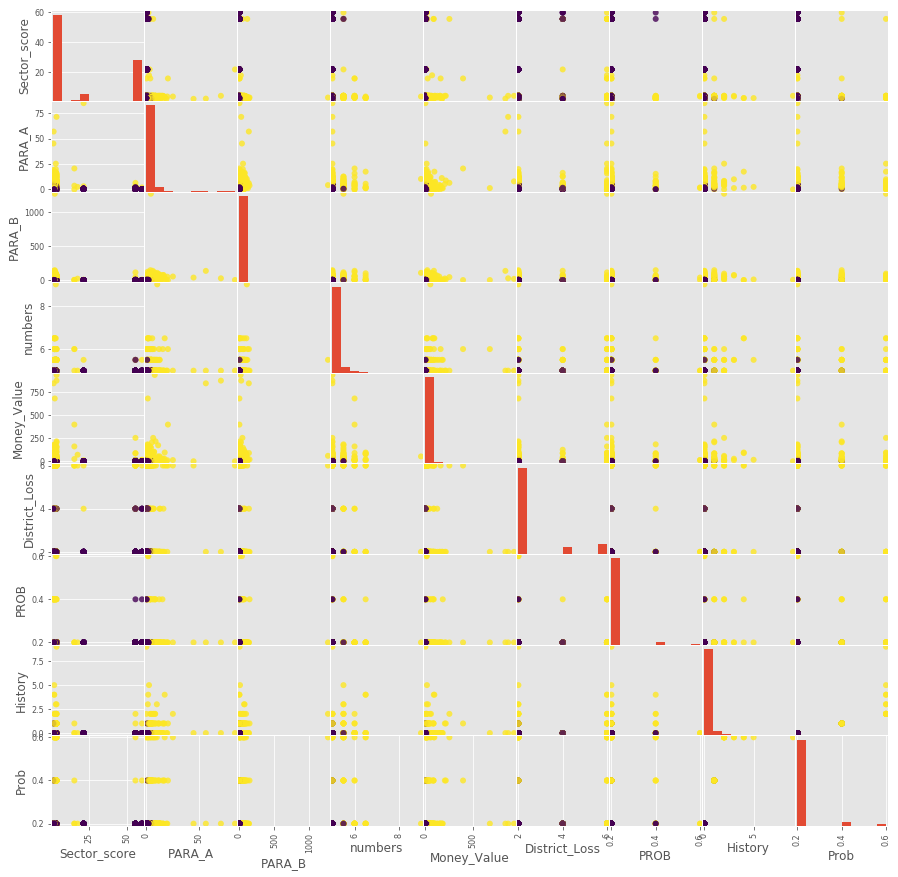

In [113]:
from pandas.plotting import scatter_matrix

%matplotlib inline
scatter_matrix(X, figsize = (15,15), c = y, alpha = 0.8, marker = 'O')
plt.show()

In [114]:
#Spliting the data into train and test sets
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

print("Size of training set: {}      size of test set:"
      " {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 582      size of test set: 194



### Soft Voting Classifiers

In [115]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [116]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf,svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9536082474226805
SVC 0.9690721649484536
VotingClassifier 0.9587628865979382


### Hard Voting Classifiers

In [117]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf,svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9536082474226805
SVC 0.9690721649484536
VotingClassifier 0.9432989690721649


### Bagging - KNN Classifier

In [118]:
#defining KNN model using the best parameters we found in project 1

from sklearn.ensemble import BaggingClassifier

knn_clf= KNeighborsClassifier(n_neighbors = 1)

bag_clf = BaggingClassifier(knn_clf, n_estimators=400,max_samples=400,bootstrap=True, oob_score = True,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_score_)
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9536082474226805
0.9759450171821306
Train score 0.993127147766323
Test score 0.9536082474226805


In [119]:
#Using Grid search to tune best bagging parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400,500],
             'max_samples': [100,200,300,400]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [100, 200, 300, 400]}


In [120]:
grid_search = GridSearchCV(BaggingClassifier(knn_clf), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 400, 'n_estimators': 200}
Best cross-validation score: 0.98


In [121]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.957045,0.970359,100,100
1,0.960481,0.968640,200,100
2,0.963918,0.967780,300,100
3,0.960481,0.969070,400,100
4,0.958763,0.969069,500,100
5,0.965636,0.984965,100,200
6,0.965636,0.982819,200,200
7,0.965636,0.985395,300,200
8,0.965636,0.984106,400,200
9,0.965636,0.984107,500,200


In [122]:
#Implementing Best parameter
bag_clf = BaggingClassifier(knn_clf, n_estimators=100,max_samples=300,bootstrap=True, oob_score = True,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_score_)
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9639175257731959
0.9742268041237113
Train score 0.9896907216494846
Test score 0.9639175257731959


In [123]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[122   2]
 [  5  65]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       124
           1       0.97      0.93      0.95        70

   micro avg       0.96      0.96      0.96       194
   macro avg       0.97      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



### Bagging - SVM 'Poly'

In [124]:
#defining SVM'Poly' model using the best parameters we found in project 1

svc_poly_clf = SVC(C=1000,degree = 1,kernel='poly')

bag_clf = BaggingClassifier(svc_poly_clf, n_estimators=400,max_samples=400,bootstrap=True, oob_score = True,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_score_)
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9948453608247423
0.979381443298969
Train score 0.9862542955326461
Test score 0.9948453608247423


In [125]:
#Using Grid search to tune best bagging parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400,500],
             'max_samples': [100,200,300,400]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [100, 200, 300, 400]}


In [126]:
grid_search = GridSearchCV(BaggingClassifier(svc_poly_clf), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 300, 'n_estimators': 100}
Best cross-validation score: 0.98


In [127]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.981100,0.981098,100,100
1,0.975945,0.982387,200,100
2,0.977663,0.981958,300,100
3,0.977663,0.982816,400,100
4,0.977663,0.981528,500,100
5,0.979381,0.981528,100,200
6,0.981100,0.982387,200,200
7,0.981100,0.981957,300,200
8,0.979381,0.981528,400,200
9,0.981100,0.981957,500,200


In [128]:
#Implementing Best parameter
bag_clf = BaggingClassifier(svc_poly_clf, n_estimators=200,max_samples=400,bootstrap=True, oob_score = True,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_score_)
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9948453608247423
0.979381443298969
Train score 0.9862542955326461
Test score 0.9948453608247423


In [129]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[124   0]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### Pasting - KNN Classifier

In [130]:
#defining KNN model using the best parameters we found in project 1

from sklearn.ensemble import BaggingClassifier

knn_clf= KNeighborsClassifier(n_neighbors = 1)

bag_clf = BaggingClassifier(knn_clf, n_estimators=400,max_samples=400,bootstrap=False,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9587628865979382
Train score 1.0
Test score 0.9587628865979382


In [131]:
#Using Grid search to tune best bagging parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400,500],
             'max_samples': [100,200,300,400],
             'bootstrap':[False]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [100, 200, 300, 400], 'bootstrap': [False]}


In [132]:
grid_search = GridSearchCV(BaggingClassifier(knn_clf), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': False, 'max_samples': 300, 'n_estimators': 100}
Best cross-validation score: 0.98


In [133]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.960481,0.971216,100,100
1,0.962199,0.969928,200,100
2,0.962199,0.970787,300,100
3,0.963918,0.970787,400,100
4,0.962199,0.970358,500,100
5,0.967354,0.987114,100,200
6,0.967354,0.987544,200,200
7,0.965636,0.988404,300,200
8,0.967354,0.987114,400,200
9,0.967354,0.987113,500,200


In [134]:
#Implementing Best parameter
bag_clf = BaggingClassifier(knn_clf, n_estimators=100,max_samples=300,bootstrap=False,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9587628865979382
Train score 0.9914089347079038
Test score 0.9587628865979382


In [135]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[121   3]
 [  5  65]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       124
           1       0.96      0.93      0.94        70

   micro avg       0.96      0.96      0.96       194
   macro avg       0.96      0.95      0.96       194
weighted avg       0.96      0.96      0.96       194



### Pasting - SVM 'Poly'

In [136]:
#defining SVM'Poly' model using the best parameters we found in project 1

svc_poly_clf = SVC(C=1000,degree = 1,kernel='poly')

bag_clf = BaggingClassifier(svc_poly_clf, n_estimators=400,max_samples=400,bootstrap=False,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9948453608247423
Train score 0.9862542955326461
Test score 0.9948453608247423


In [137]:
#Using Grid search to tune best bagging parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400,500],
             'max_samples': [100,200,300,400],
             'bootstrap':[False]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [100, 200, 300, 400], 'bootstrap': [False]}


In [138]:
grid_search = GridSearchCV(BaggingClassifier(svc_poly_clf), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': False, 'max_samples': 400, 'n_estimators': 100}
Best cross-validation score: 0.98


In [139]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_max_samples']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_max_samples
0,0.979381,0.981958,100,100
1,0.975945,0.982387,200,100
2,0.977663,0.981098,300,100
3,0.977663,0.981097,400,100
4,0.981100,0.982387,500,100
5,0.982818,0.982386,100,200
6,0.979381,0.982816,200,200
7,0.981100,0.982387,300,200
8,0.979381,0.982817,400,200
9,0.981100,0.982387,500,200


In [140]:
#Implementing Best parameter
bag_clf = BaggingClassifier(svc_poly_clf, n_estimators=100,max_samples=400,bootstrap=True,random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(bag_clf.score(X_train, y_train)))
print("Test score {}".format(bag_clf.score(X_test, y_test)))

0.9948453608247423
Train score 0.9862542955326461
Test score 0.9948453608247423


In [141]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[124   0]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### Adaboost - Logistic Regression

In [142]:
from sklearn.ensemble import AdaBoostClassifier

log_clf= LogisticRegression(penalty = 'l2', C = 2000,random_state=0)

ada_clf = AdaBoostClassifier(log_clf, n_estimators=150,algorithm="SAMME.R",learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(ada_clf.score(X_train, y_train)))
print("Test score {}".format(ada_clf.score(X_test, y_test)))

0.9948453608247423
Train score 0.9914089347079038
Test score 0.9948453608247423


In [143]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'learning_rate': [0.5,1,1.5,2]}

print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(AdaBoostClassifier(log_clf), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.5, 1, 1.5, 2]}
Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.99


In [144]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_learning_rate']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate
0,0.991409,0.990977,100,0.5
1,0.991409,0.990977,150,0.5
2,0.991409,0.990977,200,0.5
3,0.991409,0.990977,250,0.5
4,0.991409,0.990977,300,0.5
5,0.991409,0.990977,100,1
6,0.991409,0.990977,150,1
7,0.991409,0.990977,200,1
8,0.991409,0.990977,250,1
9,0.991409,0.990977,300,1


In [145]:
#Implementing Best parameter
ada_clf = AdaBoostClassifier(log_clf, n_estimators=100,  learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(ada_clf.score(X_train, y_train)))
print("Test score {}".format(ada_clf.score(X_test, y_test)))

0.9948453608247423
Train score 0.9914089347079038
Test score 0.9948453608247423


In [146]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[123   1]
 [  0  70]]

 Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      1.00      0.99       194
weighted avg       0.99      0.99      0.99       194



### Adaboost - SVM 'poly'

In [147]:
from sklearn.ensemble import AdaBoostClassifier

svc_poly_clf = SVC(C=1000,degree = 1,kernel='poly')

ada_clf = AdaBoostClassifier(svc_poly_clf, n_estimators=150,algorithm="SAMME",learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(ada_clf.score(X_train, y_train)))
print("Test score {}".format(ada_clf.score(X_test, y_test)))

0.9896907216494846
Train score 0.9810996563573883
Test score 0.9896907216494846


In [148]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'learning_rate': [0.5,1,1.5,2],
             'algorithm':['SAMME']}

print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(AdaBoostClassifier(svc_poly_clf), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.5, 1, 1.5, 2], 'algorithm': ['SAMME']}
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.98


In [149]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_learning_rate']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate
0,0.979381,0.980668,100,0.5
1,0.979381,0.981956,150,0.5
2,0.979381,0.981956,200,0.5
3,0.979381,0.981956,250,0.5
4,0.979381,0.981956,300,0.5
5,0.972509,0.978517,100,1
6,0.972509,0.978517,150,1
7,0.972509,0.978517,200,1
8,0.972509,0.978517,250,1
9,0.972509,0.978517,300,1


In [150]:
#Implementing Best parameter
ada_clf = AdaBoostClassifier(svc_poly_clf, n_estimators=100,  learning_rate=0.5,algorithm ='SAMME', random_state=0)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Train score {}".format(ada_clf.score(X_train, y_train)))
print("Test score {}".format(ada_clf.score(X_test, y_test)))

0.9896907216494846
Train score 0.9810996563573883
Test score 0.9896907216494846


In [151]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[123   1]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### Gradient Boosting - Decision Tree

In [152]:
from  sklearn.ensemble import  GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=6, n_estimators=15, learning_rate=0.2, random_state=0)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

print("Train score {}".format(gb_clf.score(X_train, y_train)))
print("Test score {}".format(gb_clf.score(X_test, y_test)))

0.9536082474226805
Train score 0.9982817869415808
Test score 0.9536082474226805


In [153]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'learning_rate': [0.5,1,1.5,2],
             'max_depth':[3,4,5,6]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.5, 1, 1.5, 2], 'max_depth': [3, 4, 5, 6]}
Best parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150}
Best cross-validation score: 0.98


In [154]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_n_estimators','param_learning_rate','param_max_depth']]
df

,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate,param_max_depth
0,0.972509,1.000000,100,0.5,3
1,0.972509,1.000000,150,0.5,3
2,0.972509,1.000000,200,0.5,3
3,0.972509,1.000000,250,0.5,3
4,0.972509,1.000000,300,0.5,3
5,0.970790,1.000000,100,0.5,4
6,0.970790,1.000000,150,0.5,4
7,0.970790,1.000000,200,0.5,4
8,0.970790,1.000000,250,0.5,4
9,0.972509,1.000000,300,0.5,4


In [155]:
#Implementing Best parameter
gb_clf = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.5, random_state=0)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

print("Train score {}".format(gb_clf.score(X_train, y_train)))
print("Test score {}".format(gb_clf.score(X_test, y_test)))

0.9639175257731959
Train score 1.0
Test score 0.9639175257731959


In [156]:
##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Confusion Matrix: 

[[120   4]
 [  3  67]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       124
           1       0.94      0.96      0.95        70

   micro avg       0.96      0.96      0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



In [158]:
from IPython.display import display
results_classification_before = pd.read_csv('scores_classification.csv')
results_classification_after = pd.read_csv('Classification_scores_other.csv')
display(results_classification_before)
display(results_classification_after)

FileNotFoundError: [Errno 2] File b'Classification_scores_other.csv' does not exist: b'Classification_scores_other.csv'

## From the above results we can see that most of these techniques donot really improve the results, results are more or less in line the same 

## PCA

1. KNN classifcation
2. Logistic Regression
3. Linear Supprt Vector Machine 
4. Kerenilzed Support Vector Machine
5. Decision Tree

In [159]:
df_ar.shape

(776, 32)

In [160]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 32 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [161]:
df_ar_clean = df_ar.drop(['Detection_Risk','LOCATION_ID','Audit_Risk'],axis = 1)
df_ar_clean.shape

(776, 29)

In [162]:
y = df_ar_clean.Risk
X = df_ar_clean.drop('Risk',axis = 1)
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [163]:
#Splitting the data into two parts: Train and Test

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)
print("Size of training set: {}      size of test set:"
      " {}\n".format(X_train_org.shape[0], X_test_org.shape[0]))

#Using Standard Scaler scaling the data
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

Size of training set: 582      size of test set: 194



In [164]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test =  pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(582, 9)
(194, 9)


### KNN - Post PCA

In [165]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17]}


In [166]:
# Using Grid Search for the best parameters

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.98


In [167]:
# Applying Best Parameters

knn = KNeighborsClassifier(grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Train set score with best parameters: 1.00
Test set score with best parameters: 0.97


In [168]:
predictions = knn.predict(X_test)

##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))


 Confusion Matrix: 

[[121   3]
 [  2  68]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.96      0.97      0.96        70

   micro avg       0.97      0.97      0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



### Logistic Regression - Post PCA

In [169]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,1500,2000,2500,3000],'penalty' : ['l1','l2']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000], 'penalty': ['l1', 'l2']}


In [170]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.99


In [171]:
lgreg= LogisticRegression(penalty = 'l1', C = 10)
lgreg.fit(X_train,y_train)

print("Train Score: {}".format(lgreg.score(X_train,y_train)))
print("Test score: {:.2f}".format(lgreg.score(X_test,y_test)))

Train Score: 0.9965635738831615
Test score: 0.99


In [172]:
predictions = lgreg.predict(X_test)

##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))


 Confusion Matrix: 

[[124   0]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### SVM 'Linear' - Post PCA

In [173]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,cv = 5,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9829059829059829, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9572649572649573, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9741379310344828, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9655172413793104, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9655172413793104, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9914529914529915, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, k

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [174]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)


{'C': 1000, 'kernel': 'linear'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.993127147766323
4


In [175]:
svc_linear_best = SVC(C=1000,kernel='linear')
svc_linear_best.fit(X_train,y_train)
print(svc_linear_best.score(X_train,y_train))

scores = cross_val_score(svc_linear_best, X_train,y_train,cv = 5)
print("Cross-validation scores : {}".format(scores))

1.0
Cross-validation scores : [1.         0.98290598 0.99137931 1.         0.99137931]


In [176]:
results = pd.DataFrame(grid_search.cv_results_)
df = results[['mean_test_score','mean_train_score','param_C']]
df.head()

,mean_test_score,mean_train_score,param_C
0,0.596220,0.596219,0.001
1,0.910653,0.910650,0.001
2,0.884880,0.884879,0.01
3,0.943299,0.943296,0.01
4,0.957045,0.963487,0.1


In [177]:
svc= SVC(C = 1000,kernel='linear')
svc.fit(X_train, y_train)
test_score = svc.score(X_test, y_test)
print("Traiin set score with best parameters: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set score with best parameters: {:.2f}".format(test_score))

Traiin set score with best parameters: 1.00
Test set score with best parameters: 0.99


In [178]:
predictions = svc.predict(X_test)

##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))


 Confusion Matrix: 

[[123   1]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### SVM 'rbf' - Post PCA

In [179]:
param_grid = {'C': [0.1,1, 10, 100,1000], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv = 5)

In [180]:
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9316239316239316, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9230769230769231, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9396551724137931, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9396551724137931, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8879310344827587, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9914529914529915, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9224137931034483, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9051724137931034, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7094017094017094, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7435897435897436, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7068965517241379, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7327586206896551, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7327586206896551, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf 

[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9572649572649573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9913793103448276, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9914529914529915, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9572649572649573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9741379310344828, total=   0.0s
[CV] C=100, gamma=0.001, kernel=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [181]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9879725085910653
17


In [182]:
svc_rbf_best = SVC(C=1000, cache_size=200, coef0=0.0, degree=3, gamma=.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svc_rbf_best.fit(X_train,y_train)
print(svc_rbf_best.score(X_train,y_train))

scores = cross_val_score(svc_rbf_best, X_train,y_train,cv = 5)
print("Cross-validation scores : {}".format(scores))

0.9914089347079038
Cross-validation scores : [1.         0.97435897 0.97413793 0.97413793 0.99137931]


In [183]:
print(svc_rbf_best.score(X_train,y_train))
print(svc_rbf_best.score(X_test,y_test))

0.9914089347079038
0.9896907216494846


In [184]:
predictions = svc_rbf_best.predict(X_test)

##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))


 Confusion Matrix: 

[[123   1]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### SVM 'Poly' - Post PCA

In [185]:
param_grid = {'C': [0.1,1, 10, 100, 1000],'degree':[1,2,3,4], 'kernel': ['poly']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv = 5)

In [186]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV]  C=0.1, degree=1, kernel=poly, score=0.9829059829059829, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV]  C=0.1, degree=1, kernel=poly, score=0.9658119658119658, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV]  C=0.1, degree=1, kernel=poly, score=0.9482758620689655, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV]  C=0.1, degree=1, kernel=poly, score=0.9568965517241379, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV]  C=0.1, degree=1, kernel=poly, score=0.9741379310344828, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, degree=2, kernel=poly, score=0.9316239316239316, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.9145299145299145, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.9137931034482759, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.8879310344827587, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.8620689655172413, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.9316239316239316, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.905982905982906, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly .........

[CV]  C=100, degree=2, kernel=poly, score=0.9658119658119658, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=100, degree=2, kernel=poly, score=0.9487179487179487, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=100, degree=2, kernel=poly, score=0.9655172413793104, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=100, degree=2, kernel=poly, score=0.9482758620689655, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=100, degree=2, kernel=poly, score=0.9396551724137931, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV]  C=100, degree=3, kernel=poly, score=0.9914529914529915, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV]  C=100, degree=3, kernel=poly, score=0.9658119658119658, total=   0.0s
[CV] C=100, degree=3, kernel=poly ........

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3, 4], 'kernel': ['poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [187]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 100, 'degree': 1, 'kernel': 'poly'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9896907216494846
12


In [188]:
svc_poly_best = SVC(C=1000, cache_size=200, coef0=0.0, degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svc_poly_best.fit(X_train,y_train)
print(svc_poly_best.score(X_train,y_train))

scores = cross_val_score(svc_poly_best, X_train,y_train,cv = 5)
print("Cross-validation scores : {}".format(scores))

1.0
Cross-validation scores : [0.99145299 0.97435897 1.         1.         0.98275862]


In [189]:
#Scores are not really good  lets see the test scores
print(svc_poly_best.score(X_train,y_train))
print(svc_poly_best.score(X_test,y_test))

1.0
0.9948453608247423


In [190]:
predictions = svc_poly_best.predict(X_test)

##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))


 Confusion Matrix: 

[[124   0]
 [  1  69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



### Decision Tree - Post PCA 

In [191]:
## data sampling without scaling
X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size = 0.25, random_state = 100)                                            

In [192]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train1,y_train1)
print(dtree.score(X_train1,y_train1))


scores = cross_val_score(dtree, X_train1,y_train1,cv = 5)
print("Cross-validation scores : {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

1.0
Cross-validation scores : [0.99145299 1.         0.99145299 0.99137931 1.        ]
Average cross-validation score: 0.99


In [193]:
dtree = DecisionTreeClassifier(random_state = 0  
      , criterion = 'gini'
      , splitter = 'best'
      , max_depth = 4
      , min_samples_split=2
      , min_samples_leaf=5)

dtree.fit(X_train1,y_train1)

predictions = dtree.predict(X_test1) ## testing the model on test data
 
##overfitting check
print("Scores on training set: {:.3f}".format(dtree.score(X_train1, y_train1)))
print("Score on test set: {:.3f}".format(dtree.score(X_test1, y_test1)))


    ##confusion matrix
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1, predictions))

Scores on training set: 0.997
Score on test set: 0.985

 Confusion Matrix: 

[[112   0]
 [  3  79]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       112
           1       1.00      0.96      0.98        82

   micro avg       0.98      0.98      0.98       194
   macro avg       0.99      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



## On whole models after PCA do not perform better , in fact their performance decreases. The results can be summarised below

In [195]:
from IPython.display import display
results_classification_pca = pd.read_csv('Classification_scores_pca.csv')
display(results_classification_pca)

FileNotFoundError: [Errno 2] File b'Classification_scores_pca.csv' does not exist: b'Classification_scores_pca.csv'

## Deep Learning Algorithm

In [ ]:
feature_list = ['Sector_score','PARA_A','PARA_B','numbers','Money_Value','District_Loss','PROB','History','Prob']
X = df_ar[feature_list]
y = df_ar.Risk
display(X.head())
display(y.head())

In [ ]:
#Splitting the data into two parts: Train and Test

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)
print("Size of training set: {}      size of test set:"
      " {}\n".format(X_train_org.shape[0], X_test_org.shape[0]))


In [ ]:
#Using Standard Scaler scaling the data

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

In [ ]:
## Imporitng Keras and other required packages
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility


### MODEL 1

In [ ]:
# step 1: build the model
model1 = Sequential()

#Step 1: build the model

#staring with simple perseptron
model1 = Sequential()
#input  layer
model1.add(Dense(30,input_dim = 9,activation = 'relu'))
#hidden layer - no hidden layer for model 1
#output layer
model1.add(Dense(1))

#Step 2: build the computational graph
model1.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

#Step 3: train the model
model1.fit(X_train,y_train,epochs = 20,batch_size=100)

In [ ]:
model1.summary()

In [ ]:
# Step 4: Model evaluation


loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
y_test.shape

In [ ]:
predicted_classes = model1.predict_classes(X_test)
predicted_classes = predicted_classes.ravel()
predicted_classes.shape

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

### MODEL 2

In [ ]:
#Building Model 2 a little complexer than model1
#Step 1: build the model
model2 = Sequential()

#input  layer
model2.add(Dense(30,input_dim = 9,activation = 'relu'))

#hidden layer
model2.add(Dense(10,activation = 'relu'))

#output layer
model2.add(Dense(1))

#Step 2: build the computational graph
model2.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

#Step 3: train the model
model2.fit(X_train,y_train,epochs = 20,batch_size=100)

In [ ]:
model2.summary()

In [ ]:
# Step 4: Model evaluation


loss_and_metrics = model2.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
predicted_classes = model2.predict_classes(X_test)
predicted_classes = predicted_classes.ravel()
predicted_classes.shape

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

### MODEL 3

In [ ]:
#Building Model 2 a little complexer than model1
#Step 1: build the model
model3 = Sequential()

#input  layer
model3.add(Dense(30,input_dim = 9,activation = 'relu'))

#hidden layer
model3.add(Dense(10,activation = 'relu'))

#hidden layer
model3.add(Dense(10,activation = 'sigmoid'))

#output layer
model3.add(Dense(1))

#Step 2: build the computational graph
model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

#Step 3: train the model
model3.fit(X_train,y_train,epochs = 20,batch_size=100)

In [ ]:
model3.summary()

In [ ]:
# Step 4: Model evaluation


loss_and_metrics = model3.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
predicted_classes = model3.predict_classes(X_test)
predicted_classes = predicted_classes.ravel()
predicted_classes.shape

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")